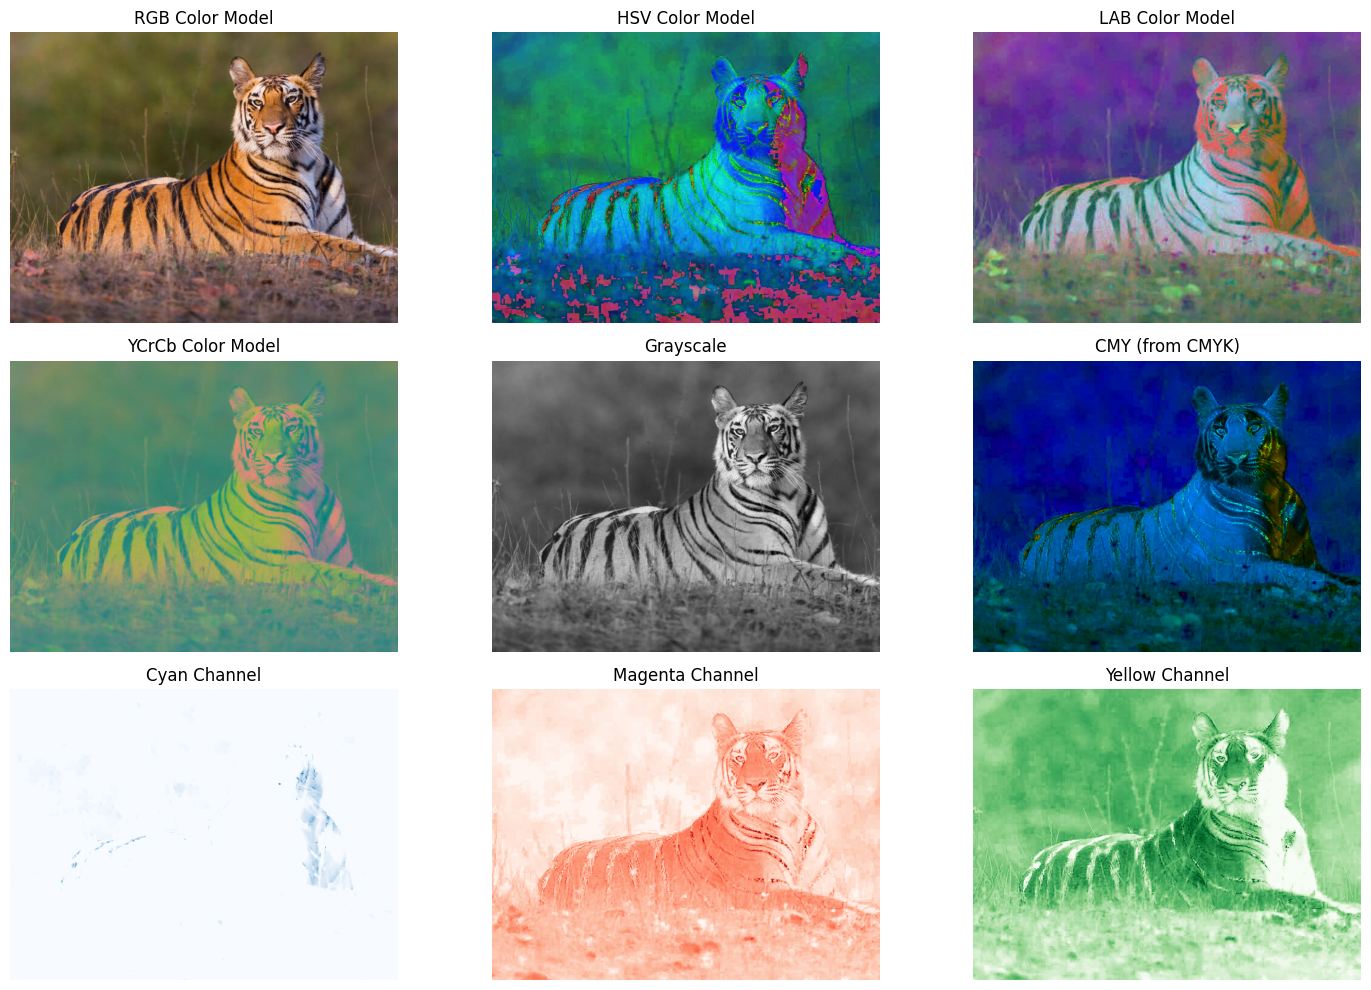

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import color

def display_color_models(image_path):
    # Load the original image
    original_img = cv2.imread(image_path)
    if original_img is None:
        print("Error: Could not load image")
        return

    # Convert BGR (OpenCV default) to RGB for display
    rgb_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

    # Convert to different color spaces
    hsv_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2HSV)
    lab_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2LAB)
    ycrcb_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2YCrCb)

    # Convert to grayscale
    gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

    # For CMYK, we need to do a custom conversion
    # Normalize RGB values to [0, 1]
    rgb_normalized = rgb_img / 255.0
    # Calculate CMYK components
    k = 1 - np.max(rgb_normalized, axis=2)
    c = (1 - rgb_normalized[:,:,0] - k) / (1 - k + 1e-6)  # Add small value to avoid division by zero
    m = (1 - rgb_normalized[:,:,1] - k) / (1 - k + 1e-6)
    y = (1 - rgb_normalized[:,:,2] - k) / (1 - k + 1e-6)
    # Stack CMYK channels
    cmyk_img = np.dstack((c, m, y, k))

    # Set up the matplotlib figure
    plt.figure(figsize=(15, 10))

    # Display RGB image
    plt.subplot(3, 3, 1)
    plt.imshow(rgb_img)
    plt.title('RGB Color Model')
    plt.axis('off')

    # Display HSV image
    plt.subplot(3, 3, 2)
    plt.imshow(hsv_img)
    plt.title('HSV Color Model')
    plt.axis('off')

    # Display LAB image (needs normalization for display)
    lab_display = lab_img.copy()
    lab_display[:,:,0] = cv2.normalize(lab_display[:,:,0], None, 0, 255, cv2.NORM_MINMAX)
    lab_display[:,:,1] = cv2.normalize(lab_display[:,:,1], None, 0, 255, cv2.NORM_MINMAX)
    lab_display[:,:,2] = cv2.normalize(lab_display[:,:,2], None, 0, 255, cv2.NORM_MINMAX)
    plt.subplot(3, 3, 3)
    plt.imshow(lab_display.astype(np.uint8))
    plt.title('LAB Color Model')
    plt.axis('off')

    # Display YCrCb image
    plt.subplot(3, 3, 4)
    plt.imshow(ycrcb_img)
    plt.title('YCrCb Color Model')
    plt.axis('off')

    # Display Grayscale image
    plt.subplot(3, 3, 5)
    plt.imshow(gray_img, cmap='gray')
    plt.title('Grayscale')
    plt.axis('off')

    # Display CMYK channels
    plt.subplot(3, 3, 6)
    plt.imshow(cmyk_img[:,:,:3])  # Display CMY (K is black channel)
    plt.title('CMY (from CMYK)')
    plt.axis('off')

    # Display individual CMYK channels
    plt.subplot(3, 3, 7)
    plt.imshow(c, cmap='Blues')
    plt.title('Cyan Channel')
    plt.axis('off')

    plt.subplot(3, 3, 8)
    plt.imshow(m, cmap='Reds')
    plt.title('Magenta Channel')
    plt.axis('off')

    plt.subplot(3, 3, 9)
    plt.imshow(y, cmap='Greens')
    plt.title('Yellow Channel')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
image_path = '/content/6aofsvaglm_Medium_WW226365.jpg'  # Replace with your image path
display_color_models(image_path)